In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Load the Dry Beans dataset
dry_bean = fetch_ucirepo(id=602) 

# Data (as pandas dataframes)
X = dry_bean.data.features 
y = dry_bean.data.targets 

# Combine into a single dataframe
df = pd.concat([X, y], axis=1)

# Print the first few rows of the dataframe
print(df.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.

In [2]:
# Visualize the first five entries of the data frame
print(df.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.

In [3]:
# Metadata
print(dry_bean.metadata)

# Variable information
print(dry_bean.variables)

{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

In [4]:
# Map class names to numerical values
df['Class'] = df['Class'].map({'DERMASON': 0, 'SIRA': 1, 'SEKER': 2, 'HOROZ': 3, 'CALI': 4, 'BARBUNYA': 5, 'BOMBAY': 6})
y = df['Class']

In [5]:
# Class variable is already stored in y
X = df.drop('Class', axis=1)

In [6]:
# Obtain statistics of the 20 attributes using describe function
print(df.describe())

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

        AspectRatio  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.

In [12]:
## number of column in dataset
df.shape


(13611, 17)

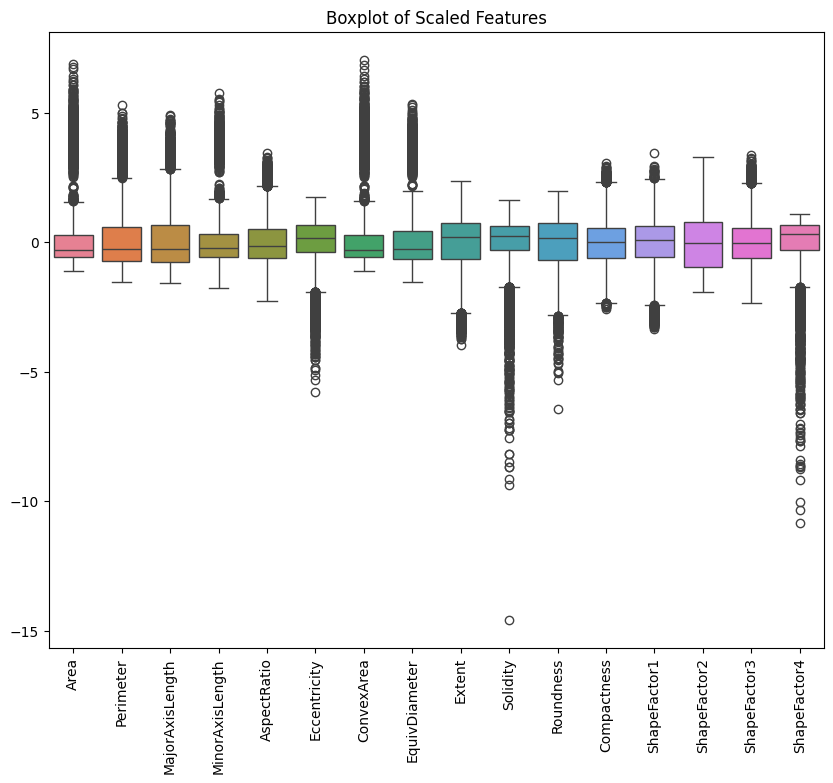

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling_cols = X.columns
X[scaling_cols] = scaler.fit_transform(X[scaling_cols])

# Visualize the scaled features
plt.figure(figsize=(10, 8))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplot of Scaled Features')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10888, 16) (10888,)
(2723, 16) (2723,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a default KNN model
knn = KNeighborsClassifier()

In [10]:
# Print default parameters of the KNN model
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [11]:
# Familiarize yourself with the `fit` and `predict` parameters
help(knn.fit)
help(knn.predict)

Help on method fit in module sklearn.neighbors._classification:

fit(X, y) method of sklearn.neighbors._classification.KNeighborsClassifier instance
    Fit the k-nearest neighbors classifier from the training dataset.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features) or                 (n_samples, n_samples) if metric='precomputed'
        Training data.
    
    y : {array-like, sparse matrix} of shape (n_samples,) or                 (n_samples, n_outputs)
        Target values.
    
    Returns
    -------
    self : KNeighborsClassifier
        The fitted k-nearest neighbors classifier.

Help on method predict in module sklearn.neighbors._classification:

predict(X) method of sklearn.neighbors._classification.KNeighborsClassifier instance
    Predict the class labels for the provided data.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_queries, n_features),                 or (n_queries, n_ind

In [12]:
# Train the default KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
# Calculate predictions on the testing data
y_pred = knn.predict(X_test)

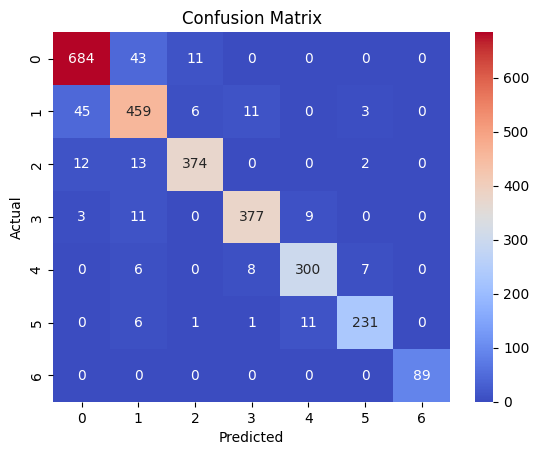

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [15]:
from sklearn.metrics import classification_report

# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       738
           1       0.85      0.88      0.86       524
           2       0.95      0.93      0.94       401
           3       0.95      0.94      0.95       400
           4       0.94      0.93      0.94       321
           5       0.95      0.92      0.94       250
           6       1.00      1.00      1.00        89

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723



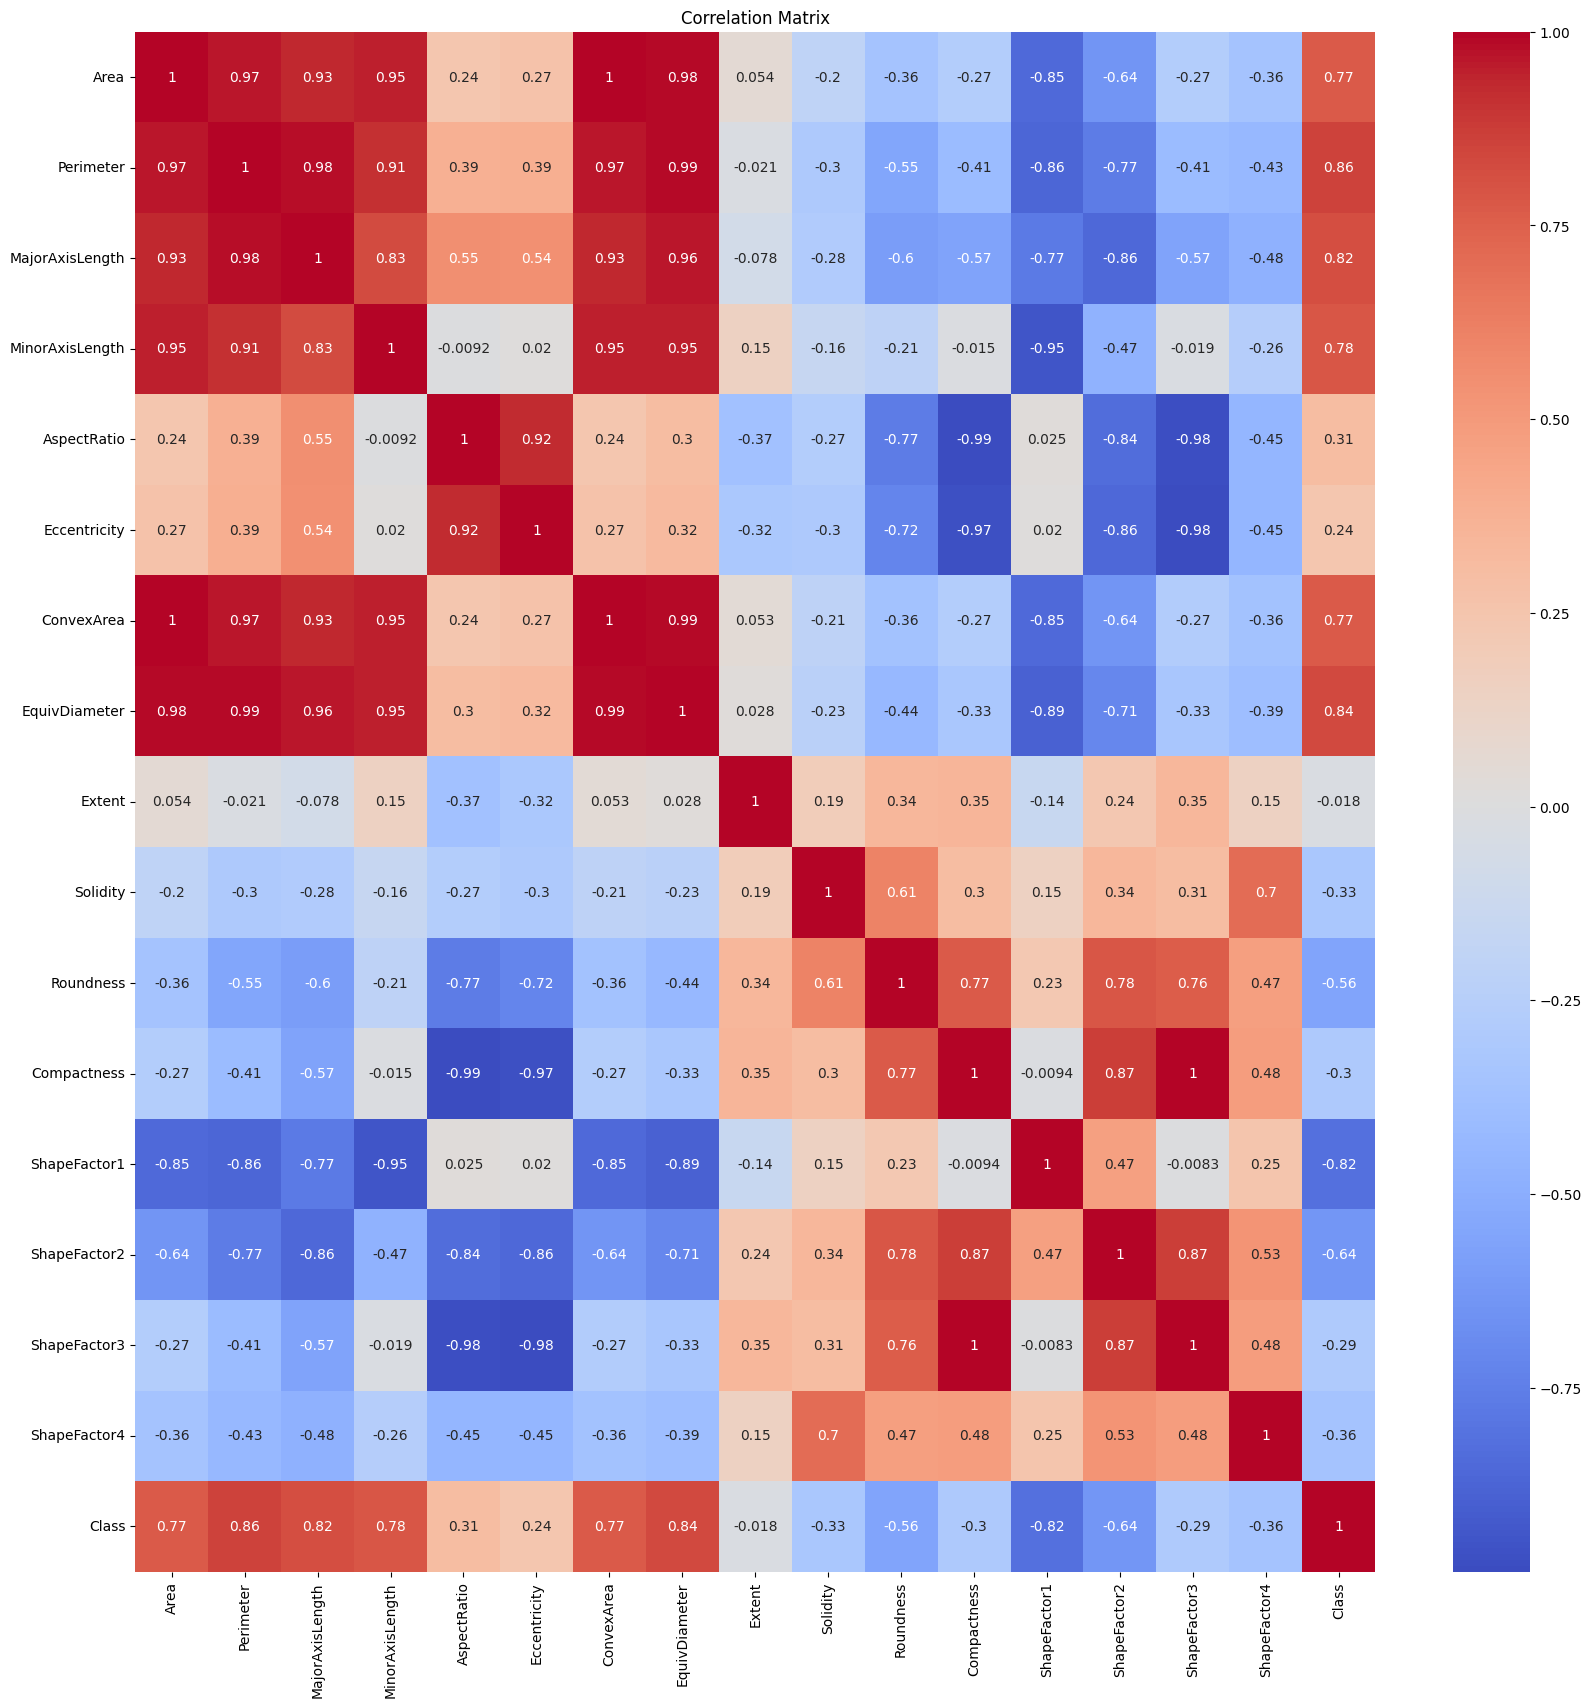

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

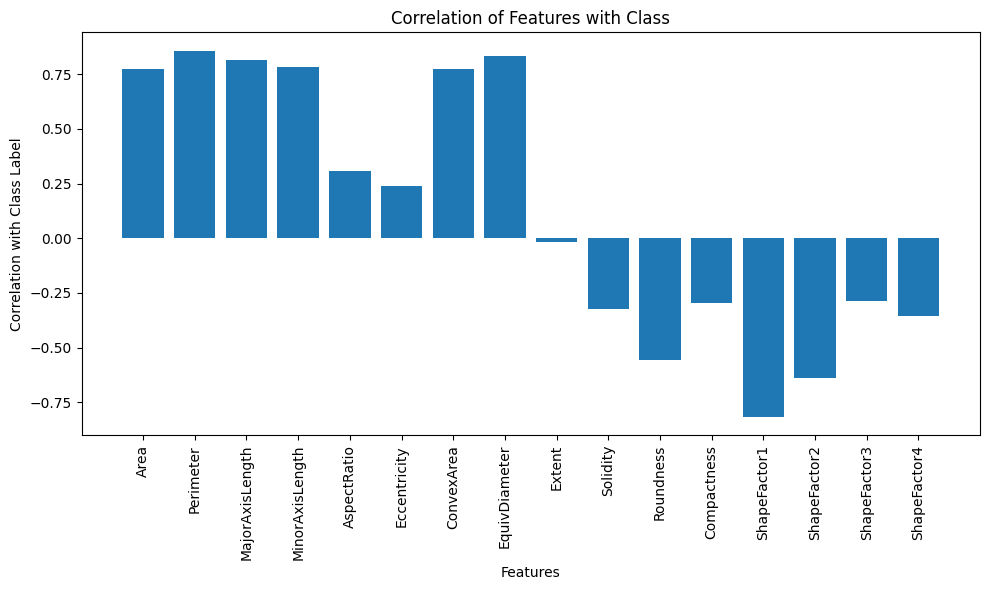

In [17]:
corr_mat = df.corr()
class_label_corr = corr_mat['Class']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df.columns[:-1], class_label_corr[:-1])  # Exclude the class label column itself
plt.xlabel('Features')
plt.ylabel('Correlation with Class Label')
plt.title('Correlation of Features with Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
import numpy as np

# Generate random weights
random_weights = np.random.rand(len(df.columns) - 1)
normalized_weights = random_weights / np.sum(random_weights)

# Custom distance metric that uses the weights
def weighted_euclidean(u, v):
    return np.sqrt(np.sum(normalized_weights * (u - v) ** 2))

weighted_knn_random = KNeighborsClassifier(metric=weighted_euclidean)

In [19]:
# Train the randomly weighted KNN model
weighted_knn_random.fit(X_train, y_train)

KNeighborsClassifier(metric=<function weighted_euclidean at 0x0000021285EC5EE0>)

In [20]:
# Calculate predictions on the testing data
random_weighted_predictions = weighted_knn_random.predict(X_test)

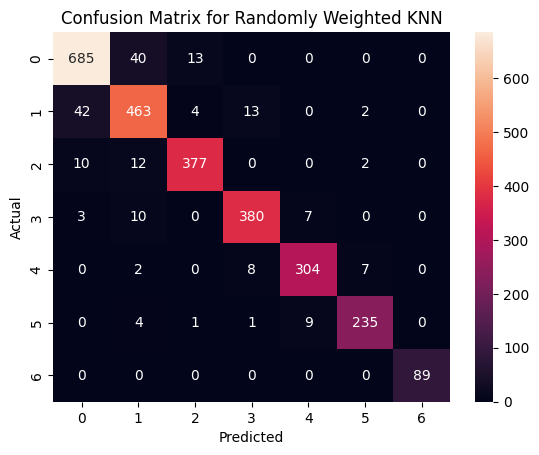

In [21]:
random_weighted_cm = confusion_matrix(y_test, random_weighted_predictions)

# Visualize the confusion matrix
sns.heatmap(random_weighted_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Randomly Weighted KNN')
plt.show()

In [22]:
print(classification_report(y_test, random_weighted_predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       738
           1       0.87      0.88      0.88       524
           2       0.95      0.94      0.95       401
           3       0.95      0.95      0.95       400
           4       0.95      0.95      0.95       321
           5       0.96      0.94      0.95       250
           6       1.00      1.00      1.00        89

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



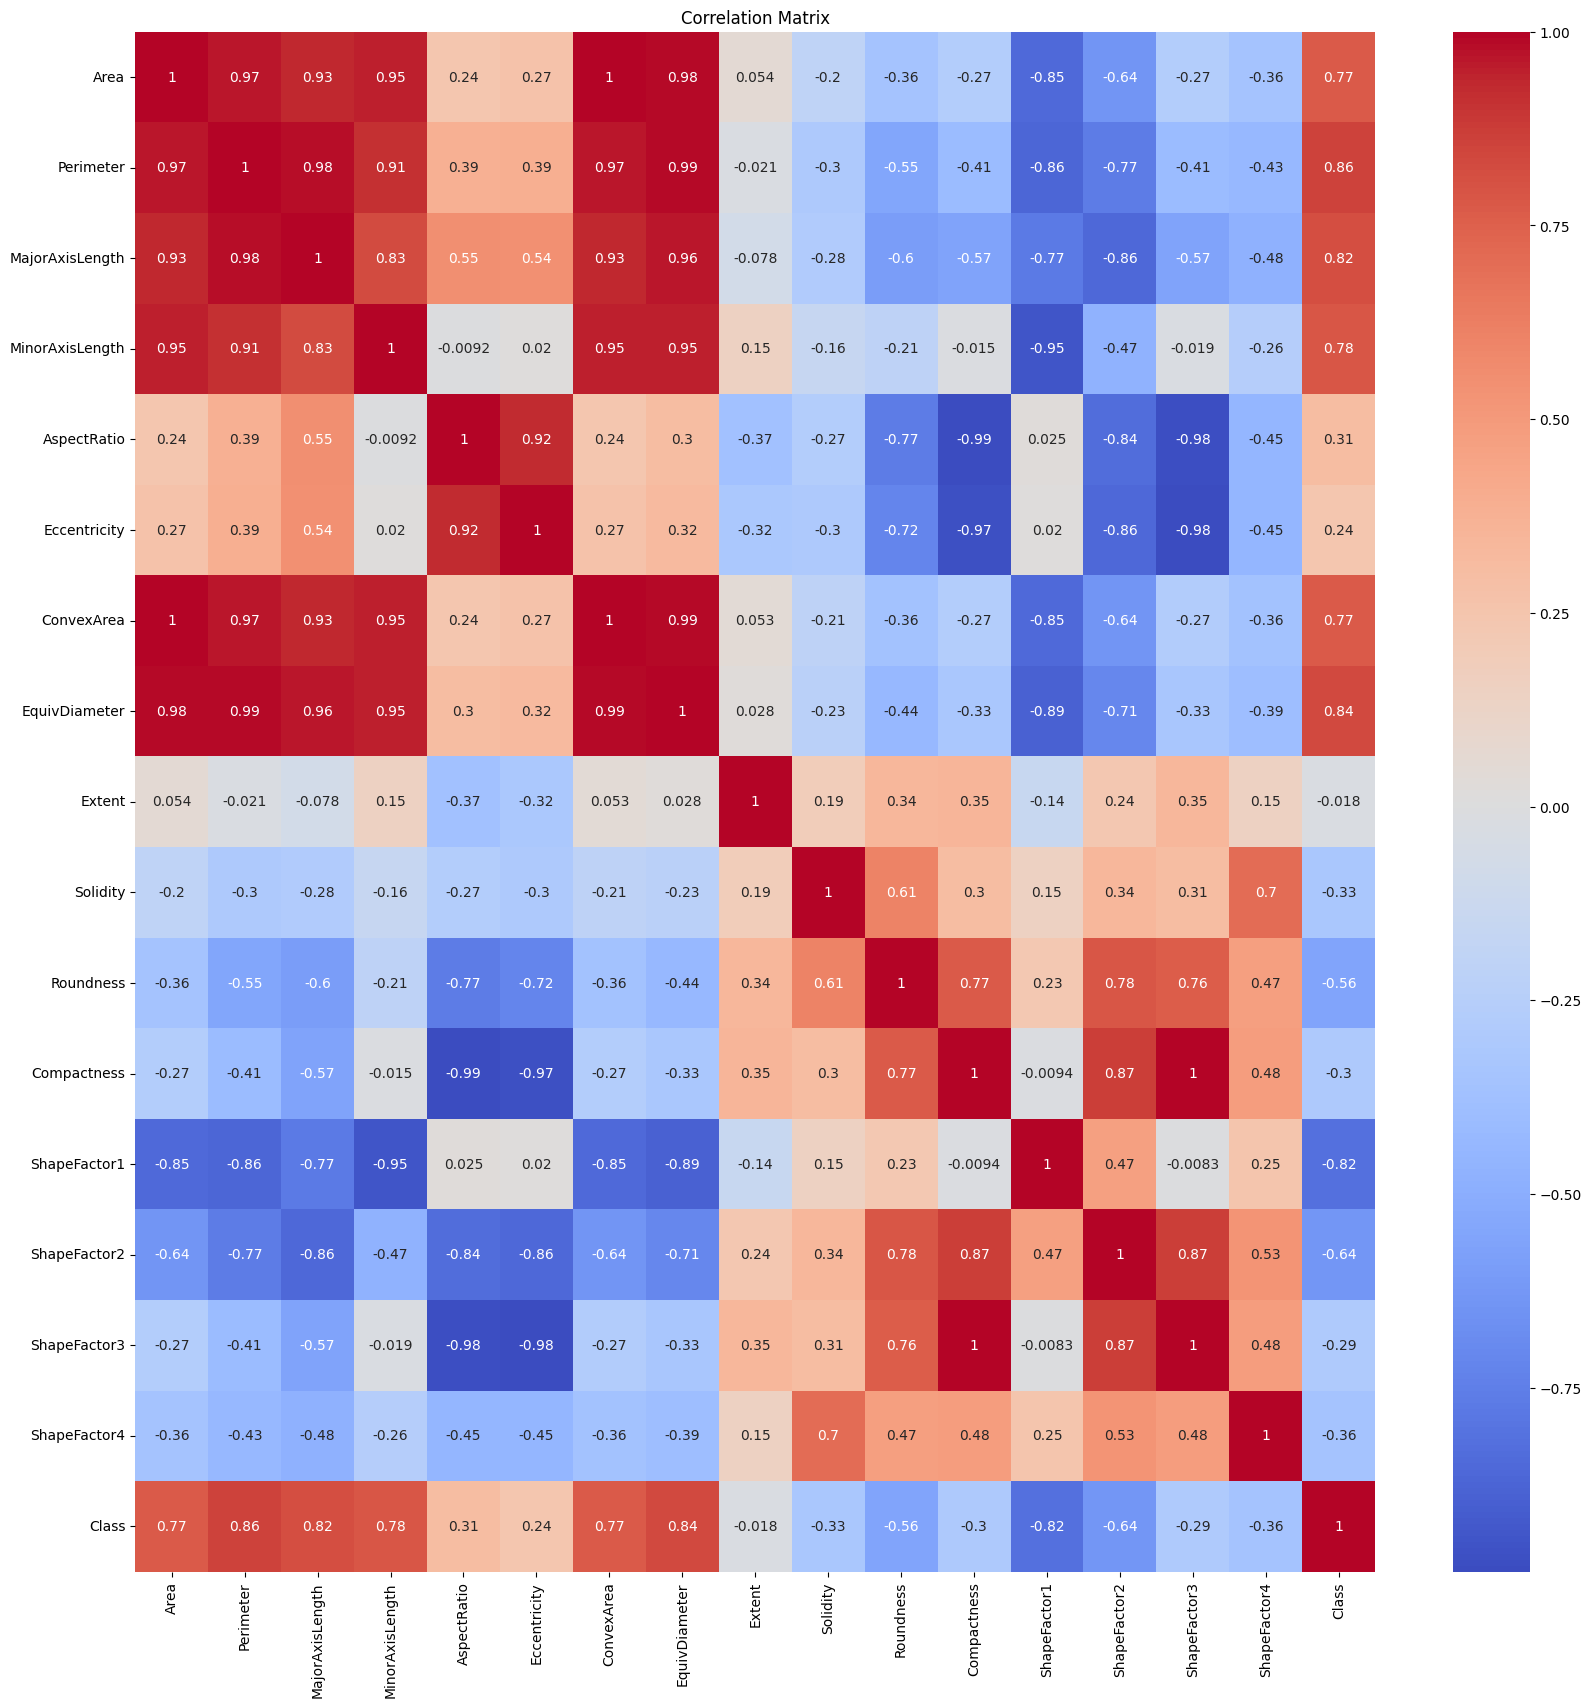

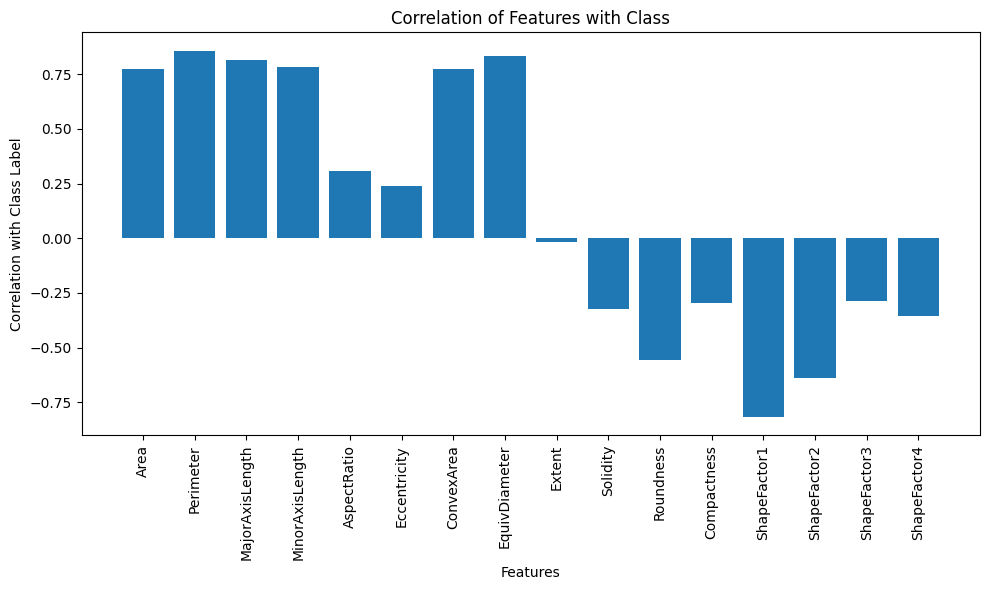

In [23]:
# Visualize correlation matrix again
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize correlation bar plot again
corr_mat = df.corr()
class_label_corr = corr_mat['Class']

plt.figure(figsize=(10, 6))
plt.bar(df.columns[:-1], class_label_corr[:-1])
plt.xlabel('Features')
plt.ylabel('Correlation with Class Label')
plt.title('Correlation of Features with Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
# Top 4 positively correlated features with the class variable
correlation = df.corr()['Class'].sort_values(ascending=False)
top_features = correlation.head(5).index[1:]  # excluding the class itself
X_top_features = df[top_features]

# Split the data into training and testing sets with the top 4 features
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=43)

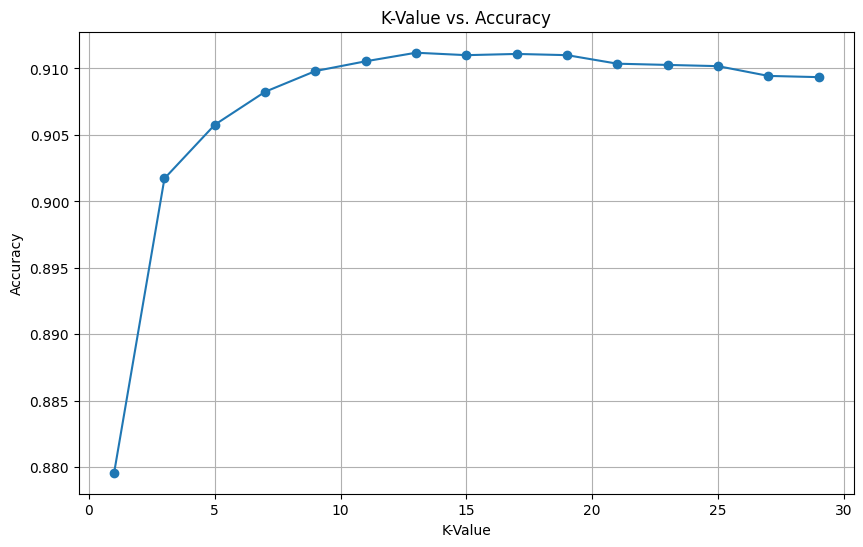

The optimum k value is: 13


In [25]:
from sklearn.model_selection import cross_val_score

# Define the range of k values to test
k_values = range(1, 31, 2)

# Initialize a list to store cross-validation scores
cross_val_scores = []

# Perform K-fold cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_top, y_train, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())

# Plot the accuracy scores versus k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o')
plt.title('K-Value vs. Accuracy')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the optimum k value
optimum_k = k_values[np.argmax(cross_val_scores)]
print(f'The optimum k value is: {optimum_k}')

In [26]:
# Instantiate the optimum KNN model
knn_optimum = KNeighborsClassifier(n_neighbors=optimum_k)

In [27]:
# Split the data into training and testing sets using the top 4 features
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=43)

In [28]:
# Train the optimum KNN model
knn_optimum.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [29]:
# Calculate predictions on the testing data
y_pred = knn_optimum.predict(X_test)

Confusion Matrix:


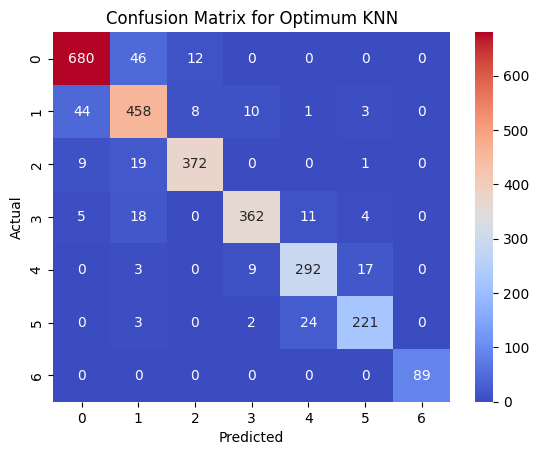

In [30]:
# Obtain the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Optimum KNN")
plt.show()

In [31]:
# Print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       738
           1       0.84      0.87      0.86       524
           2       0.95      0.93      0.94       401
           3       0.95      0.91      0.92       400
           4       0.89      0.91      0.90       321
           5       0.90      0.88      0.89       250
           6       1.00      1.00      1.00        89

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723

